<a href="https://colab.research.google.com/github/Swayamprakashpatel/HPLC/blob/main/HPLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dropout
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import time as tm

2
Epoch 1/10000
31/31 [==============================] - ETA: 0s - loss: 14.3631 - root_mean_squared_error: 3.7899
Epoch 1: val_root_mean_squared_error improved from inf to 3.33514, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
31/31 [==============================] - 4s 103ms/step - loss: 14.3631 - root_mean_squared_error: 3.7899 - val_loss: 11.1232 - val_root_mean_squared_error: 3.3351
Epoch 2/10000
31/31 [==============================] - ETA: 0s - loss: 11.0341 - root_mean_squared_error: 3.3218
Epoch 2: val_root_mean_squared_error improved from 3.33514 to 2.94745, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
31/31 [==============================] - 3s 95ms/step - loss: 11.0341 - root_mean_squared_error: 3.3218 - val_loss: 8.6875 - val_root_mean_squared_error: 2.9474
Epoch 3/10000
31/31 [==============================] - ETA: 0s - loss: 9.9194 - root_mean_squared_error: 3.1495
Epoch 3: val_root_mean_squared_error did not improve from 2.94745
31/31 [=================

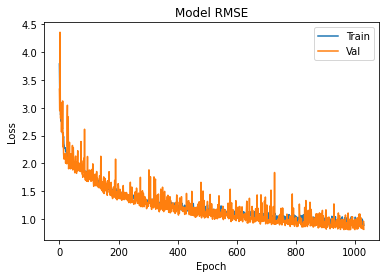

Training RMSE is
0.84672611951828
Validation RMSE is
0.8054977655410767
Training loss is
0.7169451713562012
Validation loss is
0.6488265991210938


In [ ]:
df = pd.read_csv('/content/Data.csv')
df = pd.DataFrame(df)
df = df.iloc[:,:]

X1 = df.iloc[:, 7:11]
X1 = X1.div(100).round(2)

X2 = df.iloc[:,11:12]
X2 = X2.div(14).round(2)

X3 = df.iloc[:, 12:1774]

X = [X1,X2,X3]
X = pd.concat(X, axis=1)

Y_Cat = df.iloc[:, 4:7]

Y_Num = df.iloc[:,1774:1776]


#Y_Num = Y_Num.div(1).round(2)

Y = Y_Num


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)

filepath = '/content/drive/My Drive/HPLC_NUM.hdf5'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 2),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=50, verbose =2)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1512, activation='relu', input_shape=(1767,)),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.4), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)





In [ ]:
print(Y_Num)

     RT_Drug_1  RT_Drug_2
0          5.0        9.0
1          4.0        5.0
2          4.0        6.0
3          3.0        5.0
4          3.0        2.0
..         ...        ...
963        3.0        5.0
964        5.0        2.0
965        5.0        2.0
966        5.0        1.0
967        4.0        9.0

[968 rows x 2 columns]


In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
print(Y_Num)

REGRESSION

2
Epoch 1/10000
31/31 [==============================] - ETA: 0s - loss: 47.6892 - root_mean_squared_error: 6.9057
Epoch 1: val_root_mean_squared_error improved from inf to 6.14465, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
31/31 [==============================] - 6s 158ms/step - loss: 47.6892 - root_mean_squared_error: 6.9057 - val_loss: 37.7567 - val_root_mean_squared_error: 6.1446
Epoch 2/10000
31/31 [==============================] - ETA: 0s - loss: 37.7567 - root_mean_squared_error: 6.1446
Epoch 2: val_root_mean_squared_error did not improve from 6.14465
31/31 [==============================] - 4s 114ms/step - loss: 37.7567 - root_mean_squared_error: 6.1446 - val_loss: 37.7567 - val_root_mean_squared_error: 6.1446
Epoch 3/10000
30/31 [============================>.] - ETA: 0s - loss: 37.9156 - root_mean_squared_error: 6.1576
Epoch 3: val_root_mean_squared_error did not improve from 6.14465
31/31 [==============================] - 2s 71ms/step - loss: 37.7567 - root_mea

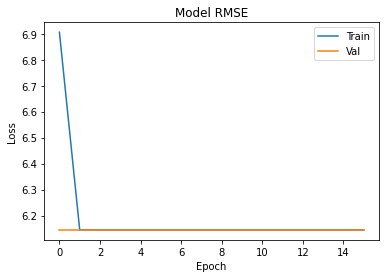

Training RMSE is
6.144649028778076
Validation RMSE is
6.144649028778076
Training loss is
37.7567138671875
Validation loss is
37.7567138671875


In [ ]:
Y = Y_Num


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)

filepath = '/content/drive/My Drive/HPLC_NUM.hdf5'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 2),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=15, verbose =2)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1512, activation='relu', input_shape=(1767,)),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             tf.keras.layers.Dense(1512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.2), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)



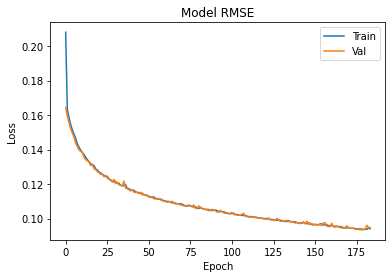

Training RMSE is
0.09371567517518997
Validation RMSE is
0.09344720840454102
Training loss is
0.008782628923654556
Validation loss is
0.008732380345463753


In [ ]:
# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)


In [ ]:

#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

#gdd.download_file_from_google_drive(file_id='1jWa1UK8cxcCuEX_Chs1zm4hfa_j_Q-Ki',
                                   #dest_path='/content/sample_data/HPLC_NUM.hdf5',
                                   #unzip=False)
#Load Model
model = load_model('/content/drive/My Drive/HPLC_NUM.hdf5', compile= True)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=83a97b825e61b8dadedef2b95155aa2f6e23060e6a32f7ca8e73affe2b786017
  Stored in directory: /root/.cache/pip/wheels/b0/8c/ba/3b00b89931153bf5a4eaa8e73bd1b0319a879cc45175326854
Successfully built pubchempy


In [ ]:
Drug_1_CID =  2244#@param {type:"number"}
Drug_2_CID =  24872560#@param {type:"number"}
Methanol =  0#@param {type:"number"}
Methanol = Methanol/100
Acetonitrile =  40#@param {type:"number"}
Acetonitrile = Acetonitrile/100
Water =  0#@param {type:"number"}
Water = Water/100
Buffer =  60#@param {type:"number"}
Buffer = Buffer/100
pH =  4#@param {type:"number"}
pH = pH/14


Drug_1_CID = pcp.Compound.from_cid(Drug_1_CID)
Drug_2_CID = pcp.Compound.from_cid(Drug_2_CID)

FPD_1 = Drug_1_CID.cactvs_fingerprint
FPD_2 = Drug_2_CID.cactvs_fingerprint

List1 = [Methanol, Acetonitrile, Water, Buffer, pH]

List2 = list(FPD_1)
List3 = list(FPD_2)
List = List1+List2+List3
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1767].astype(float))


Y_prediction = model.predict(X_Predict)
Y_prediction = Y_prediction
#Y_prediction = pd.DataFrame(Y_prediction)
print(Y_prediction)


1/1 [==============================] - 0s 108ms/step
[[4.2331343 3.6412742]]


**SYSTEM AND RT PREDICTION**

In [ ]:
df = pd.read_csv('/content/Data.csv')
df = pd.DataFrame(df)
df = df.iloc[:,:]

Y1 = df.iloc[:, 7:11]
Y1 = Y1.div(100).round(2)

Y2 = df.iloc[:,11:12]
Y2 = Y2.div(14).round(2)

X = df.iloc[:, 12:1774]

Y = [Y1,Y2]
Y = pd.concat(Y, axis=1)


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)

filepath = '/content/drive/My Drive/HPLC_NUM.hdf5'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 2),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=50, verbose =2)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.4), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)





5
Epoch 1/10000
31/31 [==============================] - ETA: 0s - loss: 0.0840 - root_mean_squared_error: 0.2898
Epoch 1: val_root_mean_squared_error improved from inf to 0.27262, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
31/31 [==============================] - 2s 50ms/step - loss: 0.0840 - root_mean_squared_error: 0.2898 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2726
Epoch 2/10000
30/31 [============================>.] - ETA: 0s - loss: 0.0598 - root_mean_squared_error: 0.2445
Epoch 2: val_root_mean_squared_error improved from 0.27262 to 0.23375, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
31/31 [==============================] - 2s 52ms/step - loss: 0.0598 - root_mean_squared_error: 0.2446 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2338
Epoch 3/10000
31/31 [==============================] - ETA: 0s - loss: 0.0533 - root_mean_squared_error: 0.2309
Epoch 3: val_root_mean_squared_error improved from 0.23375 to 0.23211, saving model to /content/